In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns


import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv('C:/Users/Filipe Rodrigues/Desktop/Mestrado DS/1º Ano/2º Semestre/Business Cases with Data Science/Case1/Case1_HotelCustomerSegmentation.csv',sep=';')

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [5]:
na_columns = df.columns[df.isna().any()].tolist()

missing_val=pd.DataFrame(df[na_columns].isna().sum(), columns=['Number_missing'])
missing_val['Percentage_missing']=np.round(100*missing_val['Number_missing']/len(df),2)

missing_val

,Number_missing,Percentage_missing
Age,4172,3.73
DocIDHash,1001,0.90


In [6]:
df.replace("", np.nan, inplace=True)
df.replace("?", np.nan, inplace=True)

In [7]:
missing_val

,Number_missing,Percentage_missing
Age,4172,3.73
DocIDHash,1001,0.90


In [8]:
#df['Age'].fillna('Unknown',inplace=True)

In [9]:
df['Age'].isna().sum()

4172

In [10]:
#df['DocIDHash'].fillna('Unknown',inplace=True)

In [11]:
df['DocIDHash'].isna().sum()

1001

In [12]:
df[df['Age']=='Unknown']['DocIDHash'].unique()

array([], dtype=object)

In [13]:
#quando age unknown dochash nao é todo igual

In [14]:
df[df['DocIDHash']=='Unknown']['Age'].unique()

array([], dtype=float64)

In [15]:
#quando docidhash é unknown a idade é sempre unknown

In [16]:
df_adoc=df[(df['Age']=='Unknown')&(df['DocIDHash']=='Unknown')]

In [17]:
for column in df_adoc.columns:
    print(df_adoc[column])
    print(df_adoc[column].unique())

Series([], Name: ID, dtype: int64)
[]
Series([], Name: Nationality, dtype: object)
[]
Series([], Name: Age, dtype: float64)
[]
Series([], Name: DaysSinceCreation, dtype: int64)
[]
Series([], Name: NameHash, dtype: object)
[]
Series([], Name: DocIDHash, dtype: object)
[]
Series([], Name: AverageLeadTime, dtype: int64)
[]
Series([], Name: LodgingRevenue, dtype: float64)
[]
Series([], Name: OtherRevenue, dtype: float64)
[]
Series([], Name: BookingsCanceled, dtype: int64)
[]
Series([], Name: BookingsNoShowed, dtype: int64)
[]
Series([], Name: BookingsCheckedIn, dtype: int64)
[]
Series([], Name: PersonsNights, dtype: int64)
[]
Series([], Name: RoomNights, dtype: int64)
[]
Series([], Name: DistributionChannel, dtype: object)
[]
Series([], Name: MarketSegment, dtype: object)
[]
Series([], Name: SRHighFloor, dtype: int64)
[]
Series([], Name: SRLowFloor, dtype: int64)
[]
Series([], Name: SRAccessibleRoom, dtype: int64)
[]
Series([], Name: SRMediumFloor, dtype: int64)
[]
Series([], Name: SRBatht

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,111733.0,55867.000000,32254.683151,1.0,27934.0,55867.0,83800.0,111733.00
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00


In [19]:
#queremos excluir os não clientes - não nos interessam porque não consomem

In [20]:
df[df['LodgingRevenue']==0]  #os que nn gastaram dinheiro 

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
unique_doc_ids_0 = set(df[df['LodgingRevenue'] == 0]['DocIDHash'].tolist())
unique_doc_ids_0

{'0x14B762ED8018FECBBC599109BE8E45711AC35ED2B5E937D46E043B943B274541',
 '0xD9969666E7BF8C877F907862CDA0675A9DD18119B94DEC890BE94FE305388DA7',
 '0xD16A08FB308CF83A13C6FB2251527A1BBB1E3AE45D133308250DAB0FC748BF99',
 '0xAD2B92D0E03E6E771C66722113D1A4DC07BDC62346529C060778FB4CC6ECEC33',
 '0x92A5ADF182323A87A7DECF8E65224D1A927F4FD7AB3F83AC9DB33545511A1B0E',
 '0xDF38DA7F4BBED69FE1B2BA3634CA2946E625C749D209A50B3F5939105C0FF2B9',
 '0x06DD5512BBE4D11B47B631CBC056B3D9A090E3F04E98C6D8133BF27A2D5B9266',
 '0xF6F7DFEB088F5729CD6D473D82875D5B03770F2ED8D24AC60CD142259B2D8BBD',
 '0x8A4BB8349804E779846C72BCDF784954B96D5FA29AE969E3EAA4CC9749DE3FC0',
 '0xD7463D191602E3FDD07164997C2CE9313944FE430F82AEF60EE85629251747C4',
 '0x5C29A4287ECDFEAE404C514642A7B463B78EA9B6D6820CB263B07A9C8892F4C8',
 '0xC36CF31797C39DB99366C3E73D052E724F056ACEE7A7014C2002656F6993CD50',
 '0x6238FA9BEDAECEF73469445D6B9D05564059A87C0166628EA47DE4B403F0BD3E',
 '0x610CC440BF1812A23376C1E9B9E85677B9476E764FE4FEED3594A756BFCCC867',
 '0x75

In [22]:
unique_doc_ids = set(df[df['LodgingRevenue'] != 0]['DocIDHash'].tolist())
unique_doc_ids

{'0x7E4E2446A3DE281864AF8C5F4183CF602854781C313CACB68C586EAFFDDC9A50',
 '0xCD4EF5A2D0CB68AE7A5F80A75E08B6D1E1B72BAA8798ABAE288725B440383FFF',
 '0xBEC3C8F87D580DB8EB224BD46EB6AC87BD1E5DED00EB33D54E55426C12612EAC',
 '0x4215A375A0605E5D17519F1E974473AD9834387AB9EC88ED08E0229461CD6157',
 '0x0D0CD8EE450DEB3A51AB12C5031040B00C827A0DB6E711DC1184327261F40764',
 '0xF382013E893C69D390E6515BAE14FDB50E3698991545C1511A7948EEAEBB69F1',
 '0xFFA21A7DF1933872EFB6273FCBD0D60D88777582E2994FA9EBC1D84209C3A246',
 '0x5C83712CC6754C91C3B0B3D2BE3B48E4742FDAE0A6EC0460B26BC430316F4069',
 '0xF9500E4FA0B0BB881716CFDD53285B6886B31480FBE36D971EB833FD649FCC9F',
 '0x36C443A6CCA1FFF868EE5A8ADCD17AB1A3DA5E8032100E41A8D28E7A03FA93A3',
 '0xE525382959B7EAFFAAE4EE441AD3029079C266FCEECA70F2085D4E6A905DB4F4',
 '0xD5A2F36F6430D4E21EF587EDD2B720ADD8728009AE51E492018C8C681083DAF6',
 '0x30695D2D8647495100B7DF100448E74D235812BA5DD420A88E012B195A2BD1CF',
 '0xAE1376BCE4CB9CC08037554A8F7415E6A2854FD7E1C63EC3724E3A94583CC57D',
 '0x78

In [23]:
l1 = []
unique_doc_ids_0_set = set(unique_doc_ids_0)
unique_doc_ids_set = set(unique_doc_ids)

for element in unique_doc_ids_0_set:
    if element in unique_doc_ids_set:
        if element not in l1:
            l1.append(element)
            
print(l1)
print(len(l1))

['0xEA15429C9536A526CAB5E58B594E74DC33057ED2DD75887182831E676993FA10', '0x7FD3C68F92AE976D140C1AC21E39049C811153D6766A06EB5D3AEC6E3809FCC0', '0xB3F5356594E569362AD07A95A13A2E3A4EC02EAEDB642A37CBDF40A4332ECCEE', '0x8D53032FB7CFC604CEDBF6470BBB4415946D8BB04C2AB85C720804F8D444F3B0', '0x5D0CCF0CFA2CD768056BCE443A4236FCE9B9902DF66E7FA7FDF99B612D39A514', '0xA17AA40483096F028BA51F9C9D06D5B18637156C9FE5A719DA42A5E0C4BBCCF1', '0xFBCD7A276C4A765E3685218B2B755408D4D7D662D07222AC25C4CDB62B10C174', '0x66824343C6D27ACD3F81656B8AA2EC3936466206D2494794908891316C4FD4E2', '0x2D5580197E4E76C71D7E41EB83922D65E86125C013120DEBC051B70844872F05', '0x972E0DA66F248082F936C13D8F3A1B2B8A980C19DFCDD4B66C1864D772DC8148', '0xB92BDABEE74C2F26EA658AD9A4877F9677C20B3ABCC433B7220B328FD103DE7F', '0xE1633B974D0604D3DCF950941FCE0C30D3A0FC0C7534C20A5027CCD87E8B70CE', '0xA6E635273FB15D32B300E8CE071B9CA8E34C1844BC60DE84B9661B1C25644580', '0x6EC01C4F5B17965A91FCDFEDA431AC1DE3F0EF535F67770FB2B282535941D73A', '0x8A7A27A221D8DABE

In [24]:
df[(df['DocIDHash'].isin(l1))&df['LodgingRevenue']!=0] #clientes que têm reservas ativas e que sao recurrentes

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0,0
59,60,PRT,NaN,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,...,0,0,0,0,0,0,0,0,0,0
65,66,PRT,NaN,1385,0x3E9698E7C95793528DF6AFE454C1D7D1B6E70B5AB13A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,6,141.50,13.5,0,...,0,0,0,0,0,0,0,0,0,0
69,70,PRT,NaN,1385,0x9ECF917572A3CA3BAFC5C7189CC7B31B04F5E87D4BE0...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,58,294.00,77.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110671,110672,PRT,NaN,45,0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0
111252,111253,ISR,55.0,40,0xA0E87B2D5430B0A2B4F4F7B6BD560BEB116BB5C6D566...,0xCE0EB4963BD893050D54B9E3D75A5937DEC502548288...,17,139.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0
111298,111299,ISR,63.0,40,0x4001CA215D174D50D797068FD1356CFB8688A851FC4C...,0x02CA2870052257CEA40619C906128A38BE42D9E02F46...,277,95.40,14.8,0,...,0,0,0,0,0,0,0,0,0,0
111300,111301,MEX,71.0,40,0xE7266FFA32AA8762D59440B841A5E05661BE32175905...,0xF638A630D5C0B3F341DE58A927AF38CB812726646153...,23,557.65,68.0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# A partir daqui conseguimos concluir que dos 33769 dochashs que vimos que não gastaram nada vimos 3465 algures no tempo acabararam 
#por visitar e gastar dinheiro (são clientes reais). Desta forma podemos criar uma coluna que conta a quantidade total de vezes que um dochashid reserva
#e não gasta no hotel mas que acaba eventualmente por ter um ou mais episodios de visita. Esta coluna pode ser traduzida em 0 e 1 
#(0-não tem reservas de momento, 1 - tem reservas de momento). 
#Não devemos apagá-las porque nem 

In [26]:
#dataframe com as reservas ativas

df_active=df[(df['LodgingRevenue'] == 0) & (df['BookingsCanceled'] == 0) & (df['BookingsNoShowed'] == 0) & (df['BookingsCheckedIn'] == 0)]

In [27]:
df_active.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,33196.0,75481.958459,23666.529882,3.0,59461.5,76183.0,94670.5,111733.0
Age,32072.0,39.966139,20.205140,-6.0,24.0,41.0,56.0,123.0
DaysSinceCreation,33196.0,365.487438,247.755592,36.0,176.0,369.0,493.0,1385.0
AverageLeadTime,33196.0,0.010513,1.915502,0.0,0.0,0.0,0.0,349.0
LodgingRevenue,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
OtherRevenue,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BookingsCanceled,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BookingsNoShowed,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BookingsCheckedIn,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PersonsNights,33196.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [28]:
#algumas das reservas ativas têm pedidos associados, e mesmo as que não têm podem vir a ter portanto eu não apagaria nenhuma

In [29]:
df_active2=df[(df['LodgingRevenue'] != 0) & (df['BookingsCanceled'] == 0) & (df['BookingsNoShowed'] == 0) & (df['BookingsCheckedIn'] == 0)]

#data frame das reservas ativas mas já pagas

In [30]:
df_active2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1.0,70580.0,NaN,70580.0,70580.0,70580.0,70580.0,70580.0
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysSinceCreation,1.0,410.0,NaN,410.0,410.0,410.0,410.0,410.0
AverageLeadTime,1.0,114.0,NaN,114.0,114.0,114.0,114.0,114.0
LodgingRevenue,1.0,249.3,NaN,249.3,249.3,249.3,249.3,249.3
OtherRevenue,1.0,18.0,NaN,18.0,18.0,18.0,18.0,18.0
BookingsCanceled,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
BookingsNoShowed,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
BookingsCheckedIn,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
PersonsNights,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [31]:
#talvez remover as ativas pq podem mudar e como tal n sao 100% fiaveis, mas no fim seguir abordagem semi supervised
#usar os clusters que formamos p classificar as reservas ativas e a partir dai prever os clientes que temos e trabalhar tb
# na situaçao de pre-visita.

In [32]:
df.DocIDHash.value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3032
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0x7EC8BADB993449373704A84592ED36BF9CD7152809C94A663A831049FBB74F1F       1
0x5825AA46E4884EF879A26E514C9D0E91AAE46494F128B0AD44D81AD639DD5A26       1
0x68C8B2108F69FF2A322604377D0DE06789F07832D156036729C355779937BEF2       1
0x5374A726D76E12468AE43D19578A8E3B298D7F73FDF68AAD3831B003EECBBFC4       1
0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7CE438BCBA07BB1012304       1
Name: count, Length: 103480, dtype: int64

In [33]:
df[df['DocIDHash']=='0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
38,39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
39,40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0,0
59,60,PRT,NaN,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109483,109484,PRT,NaN,54,0xA011EA37E7B0E7AFCF0B891BC8806A9421A8B6D1291D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,36,708.00,272.5,0,...,0,0,0,0,0,0,0,0,0,0
109889,109890,PRT,NaN,51,0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,75,616.60,72.0,0,...,0,0,0,0,0,1,0,0,0,0
110525,110526,PRT,NaN,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,...,0,0,0,0,0,0,0,0,0,0
110671,110672,PRT,NaN,45,0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# aqui vemos que o lodging e cumulativo dentro da propria reserva


In [35]:
df[df['DocIDHash']=='0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
12952,12953,PRT,51.0,1147,0xD345B7964D8B1D2438F4F54BC14AEC9C5261AC3C2CB6...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,21,6991.00,957.00,0,...,0,0,0,0,1,0,0,0,0,0
15837,15838,PRT,51.0,1105,0x1A2DCD85060585D37DE6D8B246DD54B90A427F58BD74...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,5,652.00,78.00,1,...,0,0,0,0,1,0,0,0,0,0
16387,16388,PRT,51.0,1098,0x1A2DCD85060585D37DE6D8B246DD54B90A427F58BD74...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,6,1803.00,191.00,1,...,0,0,0,0,1,0,0,0,0,0
33691,33692,PRT,51.0,806,0xC23921914E37630222F29FEAC44CAE7FE25E6B10E9F9...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,29,356.00,44.00,0,...,0,0,0,0,1,0,0,0,0,0
33700,33701,PRT,51.0,806,0xB96591E35F443A512E68447228F63946D4FB948E7E85...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,2,120.00,12.00,0,...,0,0,0,0,1,0,0,0,0,0
33825,33826,PRT,51.0,804,0x6C5F83CA37178B8711D808B3132F2CAF87D35A8C1D4E...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,4,372.10,59.90,0,...,0,0,0,0,1,0,0,0,0,0
34080,34081,PRT,51.0,800,0xB96591E35F443A512E68447228F63946D4FB948E7E85...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,4,413.00,51.00,1,...,0,0,0,0,1,0,0,0,0,0
34182,34183,PRT,51.0,798,0x6C5F83CA37178B8711D808B3132F2CAF87D35A8C1D4E...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,7,295.00,47.40,0,...,0,0,0,0,1,0,0,0,0,0
41475,41476,PRT,51.0,693,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,12,1009.00,134.00,2,...,0,0,0,0,1,0,0,0,0,0
42441,42442,PRT,51.0,671,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,50,2962.00,528.90,4,...,0,0,0,0,1,0,0,0,0,0


In [36]:
df[df['DocIDHash']=='0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2159,2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.5,3,...,0,0,0,0,1,0,0,0,0,0
22851,22852,PRT,48.0,966,0x92500586215142EBDA0057D3A792411F0D2A3E2A8455...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,1,74.00,7.0,0,...,0,0,0,0,1,0,0,0,0,0
22853,22854,PRT,48.0,966,0xD79CBB59C811C34D1228585CEAD9E6CD26E5BA342E02...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,22,1569.00,338.0,4,...,0,0,0,0,1,0,0,0,0,0
22854,22855,PRT,48.0,966,0x968E52B041E8F43DE2E14F21093DEF5439EB5251FE79...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,3,758.00,83.0,0,...,0,0,0,0,1,0,0,0,0,0
26928,26929,PRT,48.0,903,0x7FED68C6755707148189209F36950A10F2E18267C2A4...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,25,267.00,30.0,0,...,0,0,0,0,1,0,0,0,0,0
42598,42599,PRT,48.0,665,0xD79CBB59C811C34D1228585CEAD9E6CD26E5BA342E02...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,43,968.00,183.0,0,...,0,0,0,0,1,0,0,0,0,0
44883,44884,PRT,48.0,623,0xD79CBB59C811C34D1228585CEAD9E6CD26E5BA342E02...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,28,1551.00,252.0,2,...,0,0,0,0,1,0,0,0,0,0
47382,47383,PRT,48.0,595,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,24,900.00,110.0,0,...,0,0,0,0,1,0,0,0,0,0
48015,48016,PRT,48.0,588,0x312DAA3B97FDE8F21F4FDDDA880E11C9D049036FFF11...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,6,534.00,66.0,2,...,0,0,0,0,1,0,0,0,0,0
60710,60711,PRT,48.0,483,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,41,366.00,32.0,1,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df[df['DocIDHash']=='0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
6204,6205,PRT,59.0,1252,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,8,2573.7,428.0,0,...,0,0,0,0,1,0,0,0,0,0
25804,25805,PRT,59.0,921,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,4,726.0,147.6,0,...,0,0,0,0,0,0,0,0,0,0
34350,34351,PRT,59.0,796,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,4,356.0,75.0,0,...,0,0,0,0,1,0,0,0,0,0
34845,34846,PRT,59.0,788,0x2A365BFB1B52AAC7EF9B4B019C3F14FE07065ECF5BCF...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,8,867.0,81.0,0,...,0,0,0,0,1,0,0,0,0,0
40049,40050,PRT,59.0,716,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,17,129.0,2.0,0,...,0,0,0,0,1,0,0,0,0,0
45000,45001,PRT,59.0,621,0x2A365BFB1B52AAC7EF9B4B019C3F14FE07065ECF5BCF...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,25,866.1,103.5,0,...,0,0,0,0,1,0,0,0,0,0
45316,45317,PRT,59.0,616,0x2A365BFB1B52AAC7EF9B4B019C3F14FE07065ECF5BCF...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,7,109.0,26.5,0,...,0,0,0,0,0,0,0,0,0,0
61935,61936,PRT,59.0,473,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,8,318.0,84.0,0,...,0,0,0,0,1,0,0,0,0,0
65867,65868,PRT,59.0,445,0x9C0025F8C9D82156F127224D25F8292435575227EC85...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,6,348.0,16.0,0,...,0,0,0,0,0,0,0,0,0,0
66725,66726,PRT,59.0,437,0x589300DFCD520D549EF93472BC3D843EADE7AAF82C1C...,0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...,0,179.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#como vemos em varios casos de clientes habituais a idade nunca muda o que nos permite assumir que este dataset n atualiza a data apos primeiro registo.
#Desta forma se alguma vez o dataset n tiver a idade de um cliente que já esteve connosco conseguimos ir busca la.
#por outro lado conseguimos ver que entre a data de criaçao da ficha e a ultima estadia nalguns casos passam mais de 365 dias ou seja a bd é superior a um
#ano. Desta forma, ordenando a bd tendo em conta DocHashId e colando DaysSinceCreation por ordem crescente conseguimos aferir quantos dias passaram
#entre cada visita e calcular o tempo médio entre visitas.

In [39]:
df_new=df.copy()

In [40]:
df_new_active=df_new.copy()
df_2=df_new.copy()

In [41]:
df_new_active = df_new_active[(df_new_active['BookingsCanceled'] == 0) & (df_new_active['BookingsNoShowed'] == 0) & (df_new_active['BookingsCheckedIn'] == 0)]


In [42]:
df_new_active  #inclui o pessoal que tb já deu entrada de dinheiro na reserva ativa

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df_2 = df_2[~((df_2['BookingsCanceled'] == 0) & (df_2['BookingsNoShowed'] == 0) & (df_2['BookingsCheckedIn'] == 0))]

In [44]:
df_2

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.00,24.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.00,94.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,0x0BD0E67519BA9C6A100F53BE45C8B5E4FDFE79CAB071...,0xF47AA4F8422F4922863FAA5F18E30E6F8A9981D1EE7C...,43,875.00,167.8,0,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,0x438E070937F7AB205414A419AF5D17520D3E89C49960...,0xFBDAEBF917AF8A24541A54251297EB4DA9E1C40C3C9F...,7,173.55,18.0,0,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,0x39BEF6C854451EC00FD7C79A8E1B3F8DFC40BDEEC217...,0x563B66C0301693C2BAEEDFA2340820F3A51BAA895B1E...,41,98.00,14.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78536 entries, 0 to 111731
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    78536 non-null  int64  
 1   Nationality           78536 non-null  object 
 2   Age                   75489 non-null  float64
 3   DaysSinceCreation     78536 non-null  int64  
 4   NameHash              78536 non-null  object 
 5   DocIDHash             78532 non-null  object 
 6   AverageLeadTime       78536 non-null  int64  
 7   LodgingRevenue        78536 non-null  float64
 8   OtherRevenue          78536 non-null  float64
 9   BookingsCanceled      78536 non-null  int64  
 10  BookingsNoShowed      78536 non-null  int64  
 11  BookingsCheckedIn     78536 non-null  int64  
 12  PersonsNights         78536 non-null  int64  
 13  RoomNights            78536 non-null  int64  
 14  DistributionChannel   78536 non-null  object 
 15  MarketSegment         7

In [46]:
df_2[df_2['Age'].isna()]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
20,21,PRT,NaN,1385,0x792FE319C0867A1B48AED1DD032FAA5B0022E7FF5A35...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,63,224.00,156.0,0,...,0,0,0,0,1,0,0,0,0,0
38,39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
39,40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110525,110526,PRT,NaN,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,...,0,0,0,0,0,0,0,0,0,0
110658,110659,PRT,NaN,45,0x49DB5E9EC7539A405BA5F7AD3292887261A69E3A7015...,0x742F84D40C5401D0C3F09DB132D58E73FB32CD534A73...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0
110668,110669,PRT,NaN,45,0xBEB09D77B94B867D34CB05AD5894366FEEC4A51229BF...,0x30F06899F5EE12711DFD1DECCBA84BAE458A9C496BC9...,24,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0
110671,110672,PRT,NaN,45,0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_2[df_2['DocIDHash'].isna()]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
58,59,PRT,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.00,0,...,0,0,0,0,0,0,0,0,0,0
944,945,PRT,NaN,1350,0xCDA04881493C308AD327EC8BD0CF014DD514E90F48B9...,NaN,0,54.0,42.00,0,...,0,0,0,0,0,0,0,0,0,0
20496,20497,PRT,NaN,1020,0xC6E889DC7511C94DB21A4BA17711C5AFB56C18B9AB9B...,NaN,9,0.0,39.00,0,...,0,0,0,0,1,0,0,0,0,0
35429,35430,PRT,NaN,780,0xAAD113AA0A812CB11CF085F14B8AB57A1DA6F433D338...,NaN,4,1852.0,361.92,0,...,0,0,0,0,0,0,0,0,0,0


retirar aquelas com 0
retirar com o e 1 em lodging
ordernar como disse em cima

In [48]:
def fill_missing_age(df):
    # Identify rows with missing 'age' values
    missing_age_rows = df[df['Age'].isna()]

    # Filter rows of patients who visited more than once and have at least one non-missing 'age' value
    potential_fill_rows = df[df['DocIDHash'].isin(missing_age_rows['DocIDHash']) & df['Age'].notna()]
    
    # Find the number of missing 'age' values that can potentially be filled
    fillable_values = potential_fill_rows['DocIDHash'].nunique()

    # Calculate the percentage of fillable missing 'age' values
    percentage_fillable = (fillable_values / len(missing_age_rows)) * 100

    print(f"Number of fillable missing 'age' values: {fillable_values}")
    print(f"Percentage of fillable missing 'age' values: {percentage_fillable:.2f}%")

    # Create a dictionary to map patient_id to age for efficient lookup
    age_dict = dict(zip(potential_fill_rows['DocIDHash'], potential_fill_rows['Age']))

    # Fill missing 'age' values using the created dictionary
    df['Age'] = df.apply(
        lambda row: age_dict[row['DocIDHash']] if pd.isna(row['Age']) and row['DocIDHash'] in age_dict else row['Age'],
        axis=1
    )

    return df

In [49]:
fill_missing_age(df_2)

Number of fillable missing 'age' values: 25
Percentage of fillable missing 'age' values: 0.82%


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,54.0,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.00,24.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.00,94.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,0x0BD0E67519BA9C6A100F53BE45C8B5E4FDFE79CAB071...,0xF47AA4F8422F4922863FAA5F18E30E6F8A9981D1EE7C...,43,875.00,167.8,0,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,0x438E070937F7AB205414A419AF5D17520D3E89C49960...,0xFBDAEBF917AF8A24541A54251297EB4DA9E1C40C3C9F...,7,173.55,18.0,0,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,0x39BEF6C854451EC00FD7C79A8E1B3F8DFC40BDEEC217...,0x563B66C0301693C2BAEEDFA2340820F3A51BAA895B1E...,41,98.00,14.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
def fill_missing_doc(df):
    # Identify rows with missing 'age' values
    missing_age_rows = df[df['DocIDHash'].isna()]

    # Filter rows of patients who visited more than once and have at least one non-missing 'age' value
    potential_fill_rows = df[df['NameHash'].isin(missing_age_rows['NameHash']) & df['DocIDHash'].notna()]
    
    # Find the number of missing 'age' values that can potentially be filled
    fillable_values = potential_fill_rows['NameHash'].nunique()

    # Calculate the percentage of fillable missing 'age' values
    percentage_fillable = (fillable_values / len(missing_age_rows)) * 100

    print(f"Number of fillable missing 'age' values: {fillable_values}")
    print(f"Percentage of fillable missing 'age' values: {percentage_fillable:.2f}%")

    # Create a dictionary to map patient_id to age for efficient lookup
    age_dict = dict(zip(potential_fill_rows['NameHash'], potential_fill_rows['DocIDHash']))

    # Fill missing 'age' values using the created dictionary
    df['DocIDHash'] = df.apply(
        lambda row: age_dict[row['NameHash']] if pd.isna(row['DocIDHash']) and row['NameHash'] in age_dict else row['DocIDHash'],
        axis=1
    )

    return df

In [51]:
fill_missing_doc(df_2)

Number of fillable missing 'age' values: 0
Percentage of fillable missing 'age' values: 0.00%


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,54.0,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.00,24.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.00,94.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,0x0BD0E67519BA9C6A100F53BE45C8B5E4FDFE79CAB071...,0xF47AA4F8422F4922863FAA5F18E30E6F8A9981D1EE7C...,43,875.00,167.8,0,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,0x438E070937F7AB205414A419AF5D17520D3E89C49960...,0xFBDAEBF917AF8A24541A54251297EB4DA9E1C40C3C9F...,7,173.55,18.0,0,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,0x39BEF6C854451EC00FD7C79A8E1B3F8DFC40BDEEC217...,0x563B66C0301693C2BAEEDFA2340820F3A51BAA895B1E...,41,98.00,14.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
#uma vez que não é possível adivinhar docids e para evitar enviesar análise todos ids vazios serão dropados. ISto não implica nenhum problema visto,
#que são só 4 entradas.

In [53]:
df_2 = df_2[~df_2['DocIDHash'].isna()]

In [54]:
df_2.shape

(78532, 29)

In [55]:
df_2[df_2.Age.isna()]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
20,21,PRT,NaN,1385,0x792FE319C0867A1B48AED1DD032FAA5B0022E7FF5A35...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,63,224.00,156.0,0,...,0,0,0,0,1,0,0,0,0,0
100,101,PRT,NaN,1384,0xB538478A8F07BC2537A3041326CDFD19600DE9BE4400...,0xCD9840C74FBB491879BAE3AAC3C982A60767CB0E058F...,86,207.59,105.9,0,...,0,0,0,0,0,1,0,0,0,0
153,154,PRT,NaN,1384,0xCA796D4EF05ED33B0180EFB4F5767C7562AB2DD13736...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,68,243.35,65.0,0,...,0,0,0,0,0,0,0,0,0,0
176,177,PRT,NaN,1383,0xA7FEF4A43B0C39E71EC6DC6E34757FFE68D9ACF2F245...,0xD39FB3B8FDF71F5DCAD495FCEC7FE494B8B1E050D911...,81,391.20,58.5,0,...,0,0,0,0,1,0,0,0,0,0
200,201,PRT,NaN,1383,0x9D9D76B99B964B23B4EDDC5E57DEDE77372761F3FF07...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,49,232.00,52.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106575,106576,PRT,NaN,77,0xF4E67ADE04620EAA69110E124A704FDB1C432F0E2146...,0x7EC56BCA94843D27C797F400D3807144425763C2468C...,18,286.00,187.0,0,...,0,0,0,0,1,0,0,0,0,1
106670,106671,PRT,NaN,76,0x265A27A4A44E21705E58A77DCE8666CBD60D1C1E720D...,0x8BB39EC6A5FFFAD51A124CA9C4FA492E3257EF200F8D...,20,236.00,32.0,0,...,0,0,0,0,0,0,0,0,0,0
107021,107022,PRT,NaN,73,0x1D87D128AFA9E8DD45158FEC804D18B7F753A2314F15...,0xE7BBAD66021795BECB22AD95755072031BECEB1F6F9A...,122,541.00,91.5,0,...,0,0,0,0,1,0,0,0,0,0
110062,110063,PRT,NaN,50,0xC8F73BF7D1EEEC5FD84EBC889AB467DD160C5024A517...,0x1655DAF80B555C3A9D200E4A842969BAD776DA17F25D...,13,127.00,16.0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
mode_age= df_2['Age'].mode()[0]
df_2['Age'].fillna(mode_age, inplace=True)

C:\Users\Filipe Rodrigues\AppData\Local\Temp\ipykernel_8632\2596843374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Age'].fillna(mode_age, inplace=True)


In [57]:
# Alternativa
'''
#Random Forest is a good choice for tabular data like the one you described. If your data has complex 
# relationships or non-linearity, Random Forest can capture those patterns.

# Since 'primary_diagnosis' and 'secondary_diagnosis' seem to be categorical variables, label encoding 
# would be a suitable approach

def impute_additional_diagnosis(df):

    X_train_binary_copy = X_train_binary.copy()
    df__2 = df.copy()
    # Create a label encoder
    label_encoder = LabelEncoder()

    # Apply label encoding to 'primary_diagnosis' and 'secondary_diagnosis'
    df__2['primary_diagnosis'] = label_encoder.fit_transform(df__2['primary_diagnosis'])
    df__2['secondary_diagnosis'] = label_encoder.fit_transform(df__2['secondary_diagnosis']) 

    X_train_binary_copy['primary_diagnosis'] = label_encoder.fit_transform(X_train_binary_copy['primary_diagnosis'])
    X_train_binary_copy['secondary_diagnosis'] = label_encoder.fit_transform(X_train_binary_copy['secondary_diagnosis']) 

    # Separate the dataset into parts with and without missing 'additional_diagnosis'
    df_with_missing = df__2[df__2['additional_diagnosis'].isna()]
    df_without_missing = df__2[~df__2['additional_diagnosis'].isna()]

    df_with_missing_X_train = X_train_binary_copy[X_train_binary_copy['additional_diagnosis'].isna()]
    df_without_missing_X_train = X_train_binary_copy[~X_train_binary_copy['additional_diagnosis'].isna()]

    # Train the model just for X_train_binary
    
    # Define the features and target for the classification model
    X = df_without_missing_X_train[['primary_diagnosis', 'secondary_diagnosis']]
    y = (df_without_missing_X_train['additional_diagnosis'].notna()).astype(int)

    clf = RandomForestClassifier()
    clf.fit(X, y)


    # Use the trained model to predict if 'additional_diagnosis' is present for the part with missing values
    X_predict = df_with_missing[['primary_diagnosis', 'secondary_diagnosis']]
    y_predict = clf.predict(X_predict)
    y_predict_original = label_encoder.inverse_transform(y_predict)

    # Update the missing 'additional_diagnosis' values based on predictions
    df.loc[df['additional_diagnosis'].isna(), 'additional_diagnosis'] = y_predict_original
    
    return df

# Now, the missing 'additional_diagnosis' values have been imputed based on the classification model's predictions.
X_val_binary = impute_additional_diagnosis(X_val_binary)
test = impute_additional_diagnosis(test)
X_train_binary = impute_additional_diagnosis(X_train_binary)


# Now, the missing 'additional_diagnosis' values have been imputed based on the classification model's predictions.'''

"\n#Random Forest is a good choice for tabular data like the one you described. If your data has complex \n# relationships or non-linearity, Random Forest can capture those patterns.\n\n# Since 'primary_diagnosis' and 'secondary_diagnosis' seem to be categorical variables, label encoding \n# would be a suitable approach\n\ndef impute_additional_diagnosis(df):\n\n    X_train_binary_copy = X_train_binary.copy()\n    df__2 = df.copy()\n    # Create a label encoder\n    label_encoder = LabelEncoder()\n\n    # Apply label encoding to 'primary_diagnosis' and 'secondary_diagnosis'\n    df__2['primary_diagnosis'] = label_encoder.fit_transform(df__2['primary_diagnosis'])\n    df__2['secondary_diagnosis'] = label_encoder.fit_transform(df__2['secondary_diagnosis']) \n\n    X_train_binary_copy['primary_diagnosis'] = label_encoder.fit_transform(X_train_binary_copy['primary_diagnosis'])\n    X_train_binary_copy['secondary_diagnosis'] = label_encoder.fit_transform(X_train_binary_copy['secondary_diagn

In [58]:
df_2= df_2.sort_values(by=['DocIDHash', 'DaysSinceCreation'])

In [59]:
df_2

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
61250,61251,FRA,60.0,479,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,1,177.0,14.0,0,...,0,0,0,0,1,0,0,0,0,1
61171,61172,FRA,60.0,480,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,127,318.0,148.0,0,...,0,0,0,0,1,0,0,0,0,1
9699,9700,DEU,54.0,1197,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,14,695.0,100.0,0,...,0,0,0,0,1,0,0,0,0,0
37076,37077,ESP,53.0,755,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,56,165.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0
42412,42413,FRA,33.0,673,0x32495BCAB9E02E2FD0C1649616A21F555F0BF827F0E2...,0x0002ED07243C5575B6A6FBD42EF80DE8006E0CFDC21C...,2,237.0,71.6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96723,96724,USA,22.0,159,0x710FDAC10B373FEE1562C16B15617F8E58456B335E08...,0xFFFAF284C2B6E97FEA54FBFFC5C6D8E1F51C5F7F0714...,69,212.0,32.0,0,...,0,0,0,0,0,1,0,0,0,0
90867,90868,CAN,54.0,209,0xEFCD25F9257181CA15B368D4D56CB2A1B0F311351674...,0xFFFB00CE2F3F640FAE90A8BF4965B721FE0DC1C7183D...,83,256.5,74.4,0,...,0,0,0,0,0,1,0,0,0,0
35088,35089,CAN,41.0,783,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,58,218.0,14.0,0,...,0,0,0,0,0,0,0,0,0,0
110640,110641,FRA,19.0,46,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,89,911.7,31.0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
df_2[df_2['DocIDHash']=='0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
111552,111553,PRT,54.0,38,0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,204,381.60,91.2,0,...,0,0,0,0,1,0,0,0,0,0
110671,110672,PRT,54.0,45,0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,0,0
110525,110526,PRT,54.0,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,...,0,0,0,0,0,0,0,0,0,0
109889,109890,PRT,54.0,51,0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,75,616.60,72.0,0,...,0,0,0,0,0,1,0,0,0,0
109483,109484,PRT,54.0,54,0xA011EA37E7B0E7AFCF0B891BC8806A9421A8B6D1291D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,36,708.00,272.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,PRT,54.0,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,54.0,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0,0
59,60,PRT,54.0,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,...,0,0,0,0,0,0,0,0,0,0
65,66,PRT,54.0,1385,0x3E9698E7C95793528DF6AFE454C1D7D1B6E70B5AB13A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,6,141.50,13.5,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#agora ordenado podemos criar coluna com dias entre visitas para cada entrada assim como variavel tempo medio entre visitas

In [62]:
# Calculate the difference in 'DaysSinceCreation' between consecutive rows within each 'DocIDHash' group
df_2['DaysSinceCreationDiff'] = df_2.groupby('DocIDHash')['DaysSinceCreation'].diff().fillna(0)

# Calculate the average of the differences for each 'DocIDHash'
df_2['AverageDaysSinceCreationDiff'] = df_2.groupby('DocIDHash')['DaysSinceCreationDiff'].transform('mean')

In [63]:
df_2[df_2[['DocIDHash','DaysSinceCreation','DaysSinceCreationDiff','AverageDaysSinceCreationDiff','LodgingRevenue']]['DocIDHash']=='0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DaysSinceCreationDiff,AverageDaysSinceCreationDiff
111552,111553,PRT,54.0,38,0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,204,381.60,91.2,0,...,0,0,1,0,0,0,0,0,0.0,0.463843
110671,110672,PRT,54.0,45,0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,23,59.00,8.0,0,...,0,0,0,0,0,0,0,0,7.0,0.463843
110525,110526,PRT,54.0,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,...,0,0,0,0,0,0,0,0,2.0,0.463843
109889,109890,PRT,54.0,51,0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,75,616.60,72.0,0,...,0,0,0,1,0,0,0,0,4.0,0.463843
109483,109484,PRT,54.0,54,0xA011EA37E7B0E7AFCF0B891BC8806A9421A8B6D1291D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,36,708.00,272.5,0,...,0,0,0,0,0,0,0,0,3.0,0.463843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,PRT,54.0,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.463843
55,56,PRT,54.0,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0.0,0.463843
59,60,PRT,54.0,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,...,0,0,0,0,0,0,0,0,0.0,0.463843
65,66,PRT,54.0,1385,0x3E9698E7C95793528DF6AFE454C1D7D1B6E70B5AB13A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,6,141.50,13.5,0,...,0,0,0,0,0,0,0,0,0.0,0.463843


In [64]:
df_2["DaysSinceCreationDiff"].value_counts()

DaysSinceCreationDiff
0.0      74691
1.0        880
2.0        213
3.0        118
4.0        108
         ...  
718.0        1
312.0        1
474.0        1
736.0        1
813.0        1
Name: count, Length: 585, dtype: int64

C:\Anaconda\envs\DM2324\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


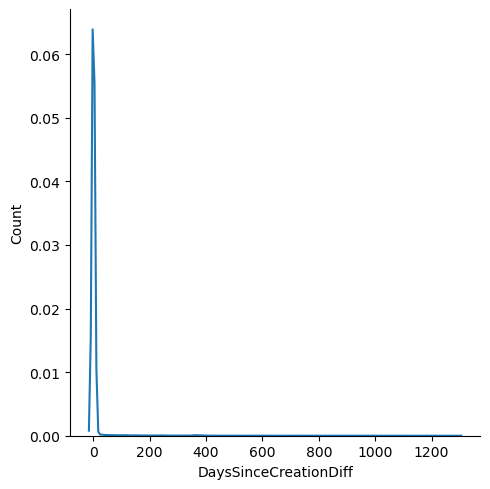

In [65]:
sns.displot(x=df_2['DaysSinceCreationDiff'], kind="kde")
plt.ylabel("Count")
plt.show()

In [66]:
df_2["AverageDaysSinceCreationDiff"].value_counts()

AverageDaysSinceCreationDiff
0.000000      70601
0.463843       2904
0.500000        370
2.000000        144
1.000000        140
              ...  
221.000000        2
136.000000        2
180.000000        2
528.500000        2
21.500000         2
Name: count, Length: 770, dtype: int64

In [75]:
# Satisfaction_rate – counts the total number of visits for each DocIDHash
df_2['Satisfaction_rate'] = df_2.groupby('DocIDHash')['DocIDHash'].transform('count')

# N_Requests – sum of all the variables related to requests
request_columns = ['SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 
                   'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 
                   'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
df_2['N_Requests'] = df_2[request_columns].sum(axis=1)

# n_sleepers_per_room/night – PersonsNights/RoomNights
df_2['n_sleepers_per_room/night'] = df_2['PersonsNights'] / df_2['RoomNights']

# Value_of_customer – LodgingRevenue / (n_sleepers_per_room/night)
df_2['Value_of_customer'] = df_2['LodgingRevenue'] / df_2['n_sleepers_per_room/night']  ##substituir lodging por total

In [68]:
df_2['Satisfaction_rate'].value_counts()

Satisfaction_rate
1       70366
2        3360
2904     2904
3         777
4         344
5         205
7         133
6         120
8          80
10         70
9          45
11         33
31         31
14         28
24         24
12         12
Name: count, dtype: int64

In [69]:
df_2['N_Requests'].value_counts()

N_Requests
0    36729
1    36041
2     5543
3      215
4        4
Name: count, dtype: int64

In [70]:
df_2['n_sleepers_per_room/night'].value_counts()

n_sleepers_per_room/night
2.000000    49606
1.000000    17915
3.000000     8583
4.000000     1906
5.000000      134
            ...  
2.625000        1
1.230769        1
1.238095        1
0.800000        1
1.846154        1
Name: count, Length: 106, dtype: int64

C:\Anaconda\envs\DM2324\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


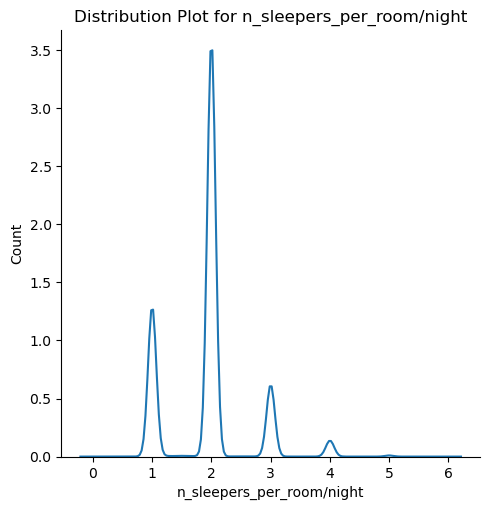

In [71]:
sns.displot(x=df_2['n_sleepers_per_room/night'], kind="kde")
plt.title(f'Distribution Plot for n_sleepers_per_room/night')
plt.xlabel('n_sleepers_per_room/night')
plt.ylabel("Count")
plt.show()

In [72]:
df_2['Value_of_customer'].value_counts()

Value_of_customer
88.000     1020
63.000      669
117.000     578
0.000       570
132.000     526
           ... 
342.900       1
183.200       1
485.325       1
202.160       1
455.850       1
Name: count, Length: 14230, dtype: int64

In [74]:
df_2

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DaysSinceCreationDiff,AverageDaysSinceCreationDiff,Satisfaction_rate,N_Requests,n_sleepers_per_room/night,Value_of_customer
61250,61251,FRA,60.0,479,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,1,177.0,14.0,0,...,0,0,0,1,0.0,0.5,2,2,2.0,88.50
61171,61172,FRA,60.0,480,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,127,318.0,148.0,0,...,0,0,0,1,1.0,0.5,2,2,2.0,159.00
9699,9700,DEU,54.0,1197,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,14,695.0,100.0,0,...,0,0,0,0,0.0,0.0,1,1,2.0,347.50
37076,37077,ESP,53.0,755,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,56,165.0,12.0,0,...,0,0,0,0,0.0,0.0,1,0,3.0,55.00
42412,42413,FRA,33.0,673,0x32495BCAB9E02E2FD0C1649616A21F555F0BF827F0E2...,0x0002ED07243C5575B6A6FBD42EF80DE8006E0CFDC21C...,2,237.0,71.6,0,...,0,0,0,0,0.0,0.0,1,0,1.0,237.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96723,96724,USA,22.0,159,0x710FDAC10B373FEE1562C16B15617F8E58456B335E08...,0xFFFAF284C2B6E97FEA54FBFFC5C6D8E1F51C5F7F0714...,69,212.0,32.0,0,...,0,0,0,0,0.0,0.0,1,1,2.0,106.00
90867,90868,CAN,54.0,209,0xEFCD25F9257181CA15B368D4D56CB2A1B0F311351674...,0xFFFB00CE2F3F640FAE90A8BF4965B721FE0DC1C7183D...,83,256.5,74.4,0,...,0,0,0,0,0.0,0.0,1,1,2.0,128.25
35088,35089,CAN,41.0,783,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,58,218.0,14.0,0,...,0,0,0,0,0.0,0.0,1,0,1.0,218.00
110640,110641,FRA,19.0,46,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,89,911.7,31.0,0,...,0,0,0,0,0.0,0.0,1,1,2.0,455.85
